Olá, tudo bem? Meu nome é Thiago e lhe dou as boas vindas a mais um curso de Machine Learning da Alura, no qual aprenderemos o que é a dimensão de um dado, o que são dados de alta dimensionalidade e como lidar com eles.

Nosso projeto tem a proposta de desenvolver a Alura_care, uma startup fictícia que tem por objetivo reduzir o número de exames necessários para o diagnóstico de um tipo específico de câncer. Para isso, iniciaremos um pré-processamento dos dados, aprendendo a identificar, por exemplo, células vazias, e como lidar com esse tipo de problema. Também identificaremos valores constantes nos dados e como eles podem impactar ou não no processo de classificação, além de como a correlação influe neste mesmo processo.

Feito isso, iniciaremos os métodos de seleção de features automáticos, como o SelectKBest e o RFE. Além disso, conseguiremos determinar qual o conjunto que nos gerará o melhor resultado possível no processo de classificação, quantas features precisaremos e quais são essas features.

Por último, aprenderemos como visualizar em um plano um dado de alta dimensionalidade, reduzindo a dimensão mas mantendo o maior número possível de informações.

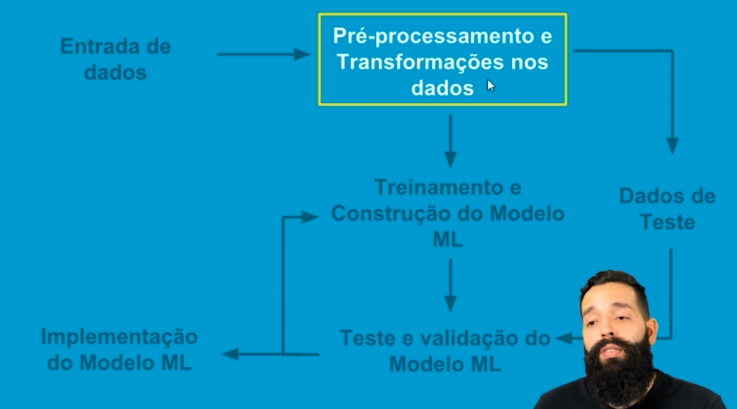

Nesse curso de Machine Learning aprenderemos a lidar com dados de alta dimensionalidade. Na construção de um modelo de Machine Learning, começamos com a entrada de dados. Após essa etapa, precisamos fazer um pré-processamento e a transformação dos dados recebidos para torná-los acessíveis aos algoritmos de Machine Learning. Depois, realizamos a segregação entre dados de teste e dados de treinamento.

Com os dados de treinamento, iniciamos a construção do modelo de Machine Learning. Feita essa construção, realizamos um teste e uma validação do modelo. Caso os resultados não sejam os esperados, retornamos para a construção do modelo, entrando em um loop chamado de "loop de treino e teste". Já se atingimos o resultado esperado, partimos para a implementação do modelo.

Nosso curso passará por praticamente todo o fluxo da construção de um modelo de Machine Learning, com foco principalmente no pré-processamento e na transformação de dados com alta dimensionalidade. Mas o que são dimensões de um dado?

Temos 33 dimensões nessa base de dados, e a questão que a Alura Care deseja responder é: **será possível reduzirmos a necessidade de tantos exames para chegar a um diagnóstico de maneira efetiva?** Juntos, responderemos essa questão!

dados originais = https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
import pandas as pd
from numpy import random

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
from sklearn.preprocessing import StandardScaler

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

In [59]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:, inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

    plt.figure(figsize = (10, 10))
    sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data=dados_plot, split = True,
                   linewidth = 1, width = 0.9, inner = 'quartile')  # Ajustes feitos aqui
    plt.xticks(rotation=90)
    plt.title('Distribuição dos Valores dos Exames por Diagnóstico')
    plt.xlabel('Exames')
    plt.ylabel('Valores')
    plt.legend(title='Diagnóstico')
    plt.show()

In [3]:
resultados_exames = pd.read_csv('dados_exames.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
resultados_exames.shape

(569, 35)

In [5]:
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(['id', 'diagnostico'], axis = 1)
diagnostico = resultados_exames['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [6]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [7]:
treino_y.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

In [8]:
classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print(classificador.score(teste_x, teste_y))


0.9370629370629371


## Tratamento dados nulos

In [9]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [10]:
porcentagem_nulos_por_coluna = resultados_exames.isnull().mean()*100

print(porcentagem_nulos_por_coluna)

id              0.000000
diagnostico     0.000000
exame_1         0.000000
exame_2         0.000000
exame_3         0.000000
exame_4         0.000000
exame_5         0.000000
exame_6         0.000000
exame_7         0.000000
exame_8         0.000000
exame_9         0.000000
exame_10        0.000000
exame_11        0.000000
exame_12        0.000000
exame_13        0.000000
exame_14        0.000000
exame_15        0.000000
exame_16        0.000000
exame_17        0.000000
exame_18        0.000000
exame_19        0.000000
exame_20        0.000000
exame_21        0.000000
exame_22        0.000000
exame_23        0.000000
exame_24        0.000000
exame_25        0.000000
exame_26        0.000000
exame_27        0.000000
exame_28        0.000000
exame_29        0.000000
exame_30        0.000000
exame_31        0.000000
exame_32        0.000000
exame_33       73.637961
dtype: float64


Como a maioria dos dados do exame 33 é nulo, 73,63% dos dados, o melhor é remover a coluna

In [16]:
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(['id', 'diagnostico'], axis = 1)
diagnostico = resultados_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(['exame_33'], axis = 1)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print(f'Resultado da classificação: {classificador.score(teste_x, teste_y) * 100:.2f}%')

Resultado da classificação: 92.40%


Utilização do Dummies para comparar se o resultado anterior é bom para ser usado como baseline quando for reduzir a dimensionalidade. 
A estratégia que será utilizada é do diagnóstico com mais frequente

In [18]:
SEED = 123143
random.seed(SEED)

classificador_dummies = DummyClassifier(strategy = 'most_frequent')
classificador_dummies.fit(treino_x, treino_y)
print(f'Resultado da classificação dummies: {classificador_dummies.score(teste_x, teste_y) * 100:.2f}%')

Resultado da classificação dummies: 66.67%


Como o valor do Dummies chegou nem perto, realmente utilizaremos o valor do classificador como baseline, o valor é de 92.40%

Para saber os valores de cada exame em relação a benigno e maligno

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

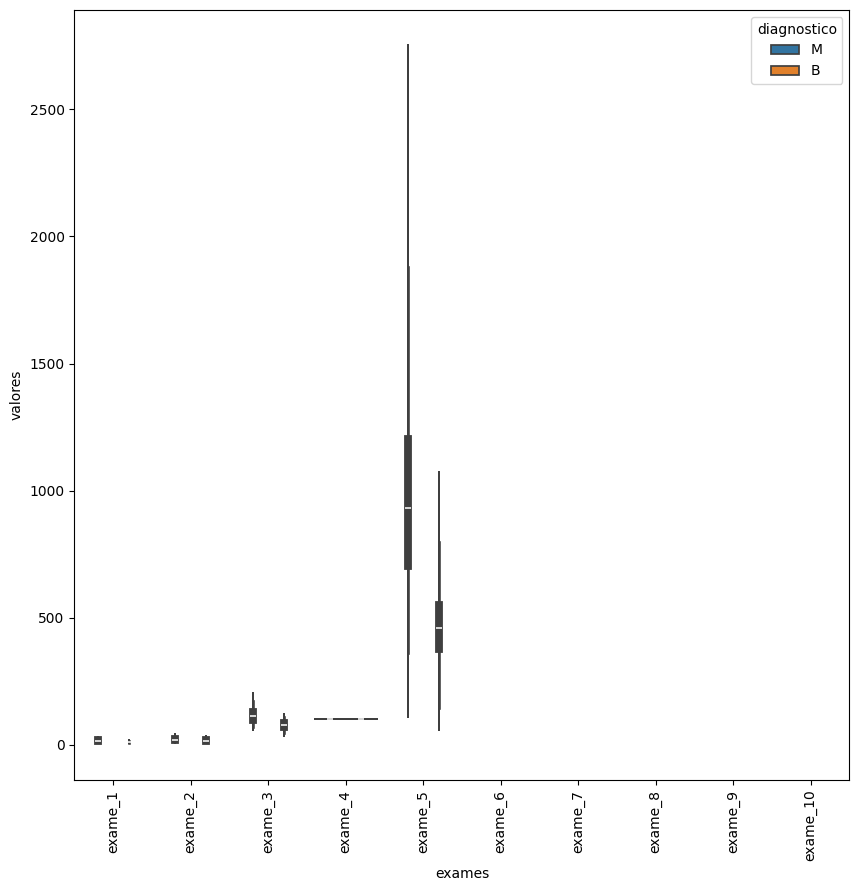

In [36]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:, 0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize = (10, 10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot)
plt.xticks(rotation = 90) # rodar a legenda x

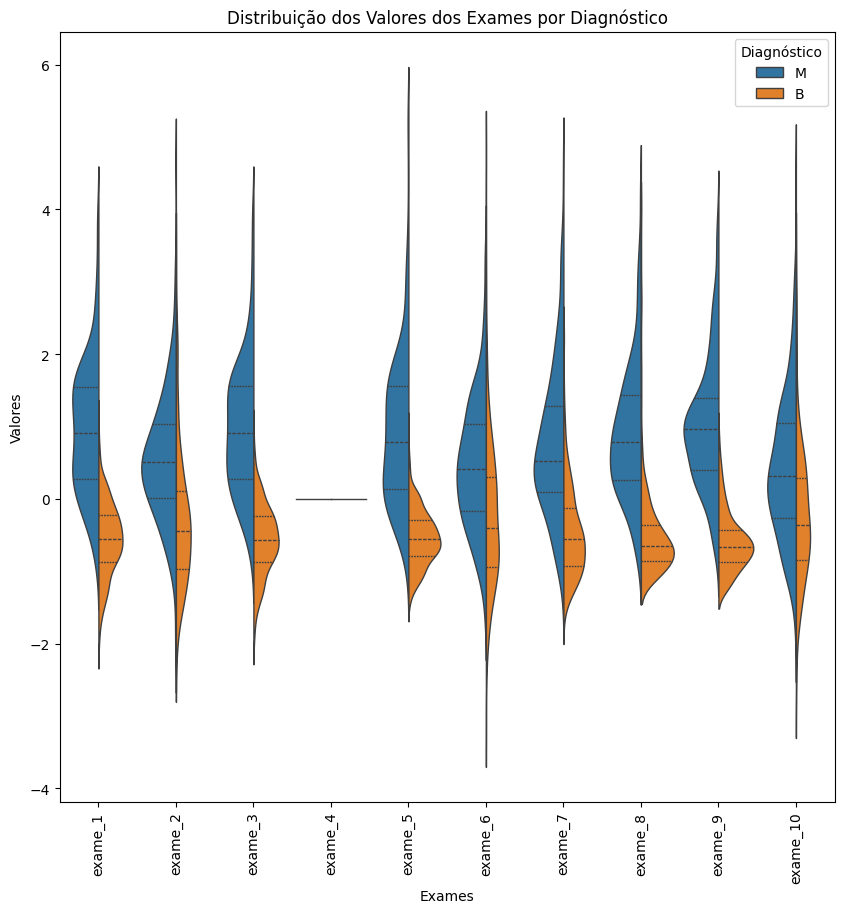

In [62]:
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:, 0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize=(10, 10))
sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True,
               linewidth=1, width=0.9, inner='quartile')  # Ajustes feitos aqui
plt.xticks(rotation=90)
plt.title('Distribuição dos Valores dos Exames por Diagnóstico')
plt.xlabel('Exames')
plt.ylabel('Valores')
plt.legend(title='Diagnóstico')
plt.show()

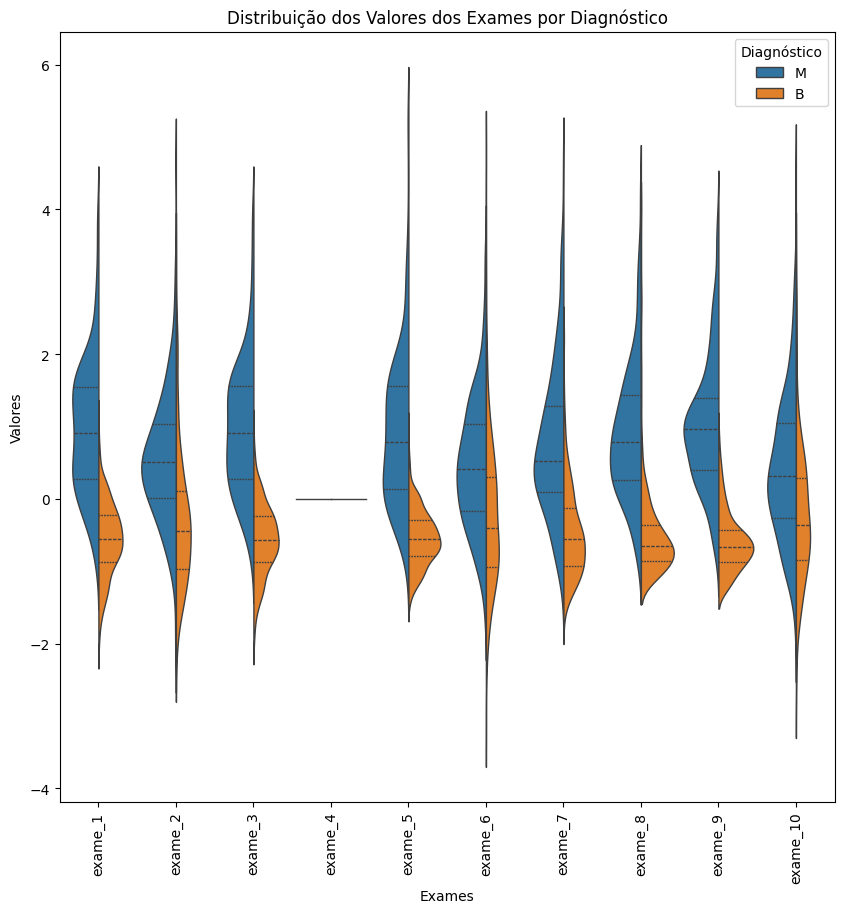

In [61]:
grafico_violino(valores_exames_v2, 0, 10)

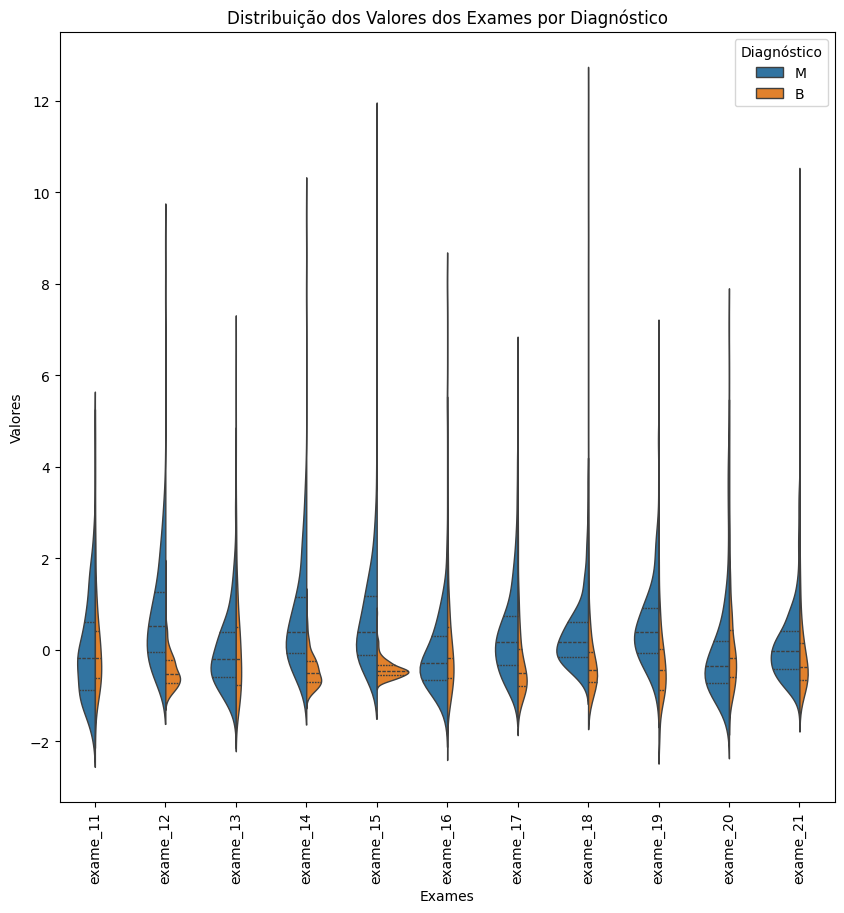

In [60]:
grafico_violino(valores_exames_v2, 10, 21)

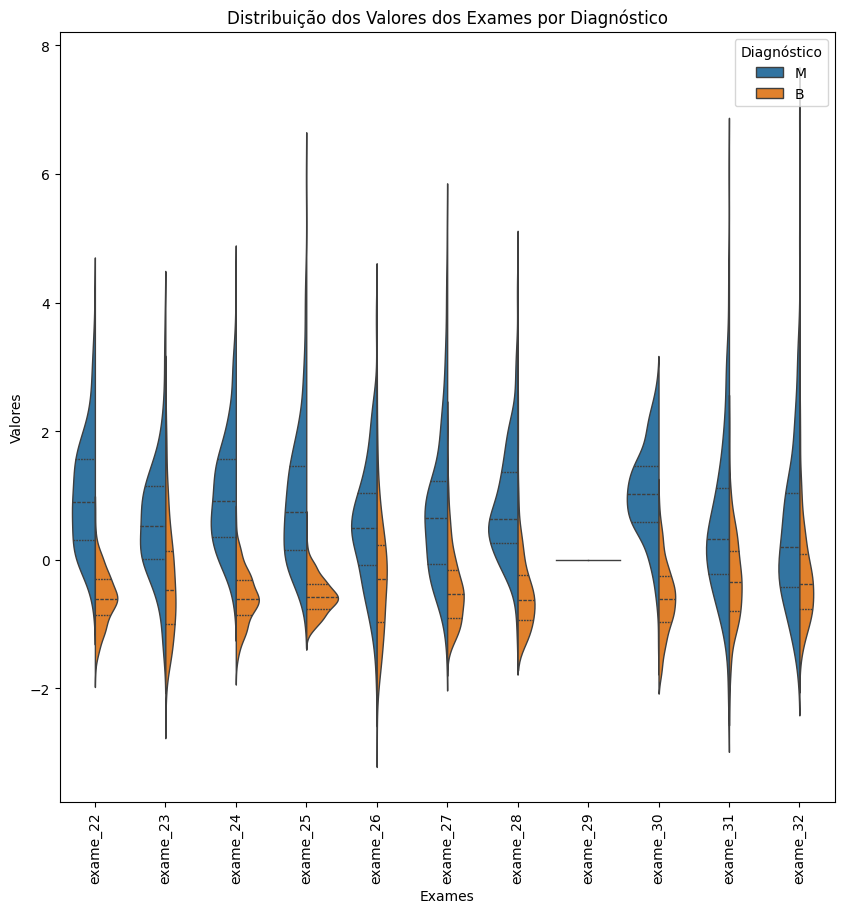

In [63]:
grafico_violino(valores_exames_v2, 21, 32)

In [64]:
valores_exames_v1['exame_4']

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

In [65]:
valores_exames_v1['exame_29']

0      0.786
1      0.786
2      0.786
3      0.786
4      0.786
       ...  
564    0.786
565    0.786
566    0.786
567    0.786
568    0.786
Name: exame_29, Length: 569, dtype: float64

Conclusões:
1. Exame 4 e 29 são valores constantes, ou seja, não está impactando nos nossos resultados, podemos então eliminar essas features

In [66]:
valores_exames_v3 = valores_exames_v2.drop(['exame_4', 'exame_29'], axis = 1)

In [69]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print(f'Resultado da classificação: {classificador.score(teste_x, teste_y) * 100:.2f}%')

In [70]:
classificar(valores_exames_v3)

Resultado da classificação: 92.98%


## Matriz de correlação

In [71]:
valores_exames_v3

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [75]:
matriz_correlacao = valores_exames_v3.corr()
matriz_correlacao

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

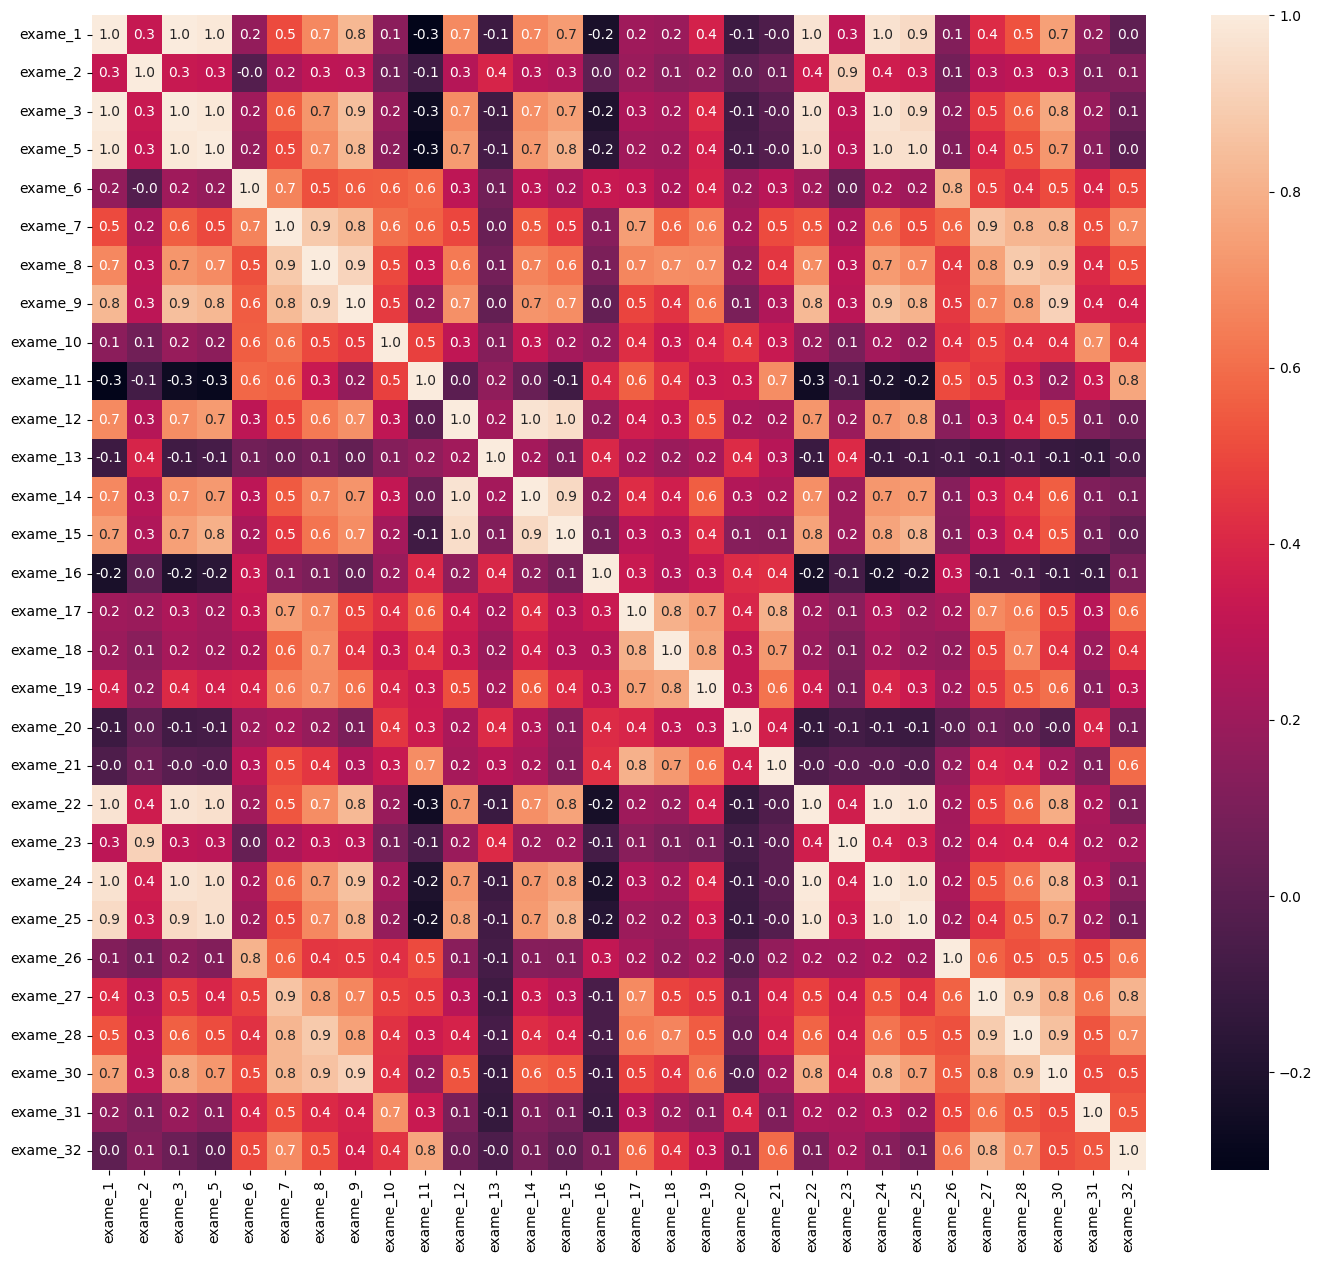

In [79]:
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')

# annot = valor da correlação dentro de cada quadradinho
# fmt = casa decimal do annot

In [80]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

Variaveis altamente correlacionadas

In [84]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [85]:
valores_exames_v4 = valores_exames_v3.drop(['exame_1', 'exame_3', 'exame_22', 'exame_24'], axis = 1)

classificar(valores_exames_v4)

Resultado da classificação: 91.81%


Diminuiu.

Ao excluir as variaveis altamente correlacionadas, excluímos as duas e era pra excluir apenas 1

Vamos excluir apenas a 3 e a 24

In [86]:
valores_exames_v5 = valores_exames_v3.drop(['exame_3', 'exame_24'], axis = 1)

classificar(valores_exames_v5)

Resultado da classificação: 92.98%
